# Bowling Data Set EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data set

In [3]:
df=pd.read_csv("cleanBowling.csv")

##### First 5 Rows

In [4]:
df.head()

,match_id,match_name,home_team,away_team,bowling_team,venue,city,innings_id,fullName,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs,captain
0,1298179,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,1,Sam Curran,4.0,0,12,3,3.00,15,0,0,0,0,False
1,1298179,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,1,Chris Jordan,4.0,0,27,2,6.75,9,3,0,0,0,False
2,1298179,ENG v PAK,PAK,ENG,PAK,Melbourne Cricket Ground,Melbourne,2,Shadab Khan,4.0,0,20,1,5.00,10,1,0,0,0,False
3,1298178,ENG v INDIA,INDIA,ENG,ENG,Adelaide Oval,Adelaide,1,Adil Rashid,4.0,0,20,1,5.00,8,1,0,0,0,False
4,1298177,NZ v PAK,NZ,PAK,PAK,Sydney Cricket Ground,Sydney,1,Shaheen Shah Afridi,4.0,0,24,2,6.00,11,2,0,0,0,False


##### Get No OF Rows and Columns

In [5]:
df.shape

(500, 20)

##### Get the summerized information of the data set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       500 non-null    int64  
 1   match_name     500 non-null    object 
 2   home_team      500 non-null    object 
 3   away_team      500 non-null    object 
 4   bowling_team   500 non-null    object 
 5   venue          500 non-null    object 
 6   city           500 non-null    object 
 7   innings_id     500 non-null    int64  
 8   fullName       500 non-null    object 
 9   overs          500 non-null    float64
 10  maidens        500 non-null    int64  
 11  conceded       500 non-null    int64  
 12  wickets        500 non-null    int64  
 13  economyRate    500 non-null    float64
 14  dots           500 non-null    int64  
 15  foursConceded  500 non-null    int64  
 16  sixesConceded  500 non-null    int64  
 17  wides          500 non-null    int64  
 18  noballs   

##### Get Numerical Data descriptive statistics data

In [7]:
df.describe()

,match_id,innings_id,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs
count,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.298157e+06,1.494000,3.154000,0.03400,23.170000,1.030000,7.593920,7.642000,1.818000,0.662000,0.618000,0.092000
std,1.351611e+01,0.500465,1.038615,0.19214,10.149637,1.023325,2.900713,4.216324,1.509116,0.872513,0.890878,0.340246
min,1.298135e+06,1.000000,0.500000,0.00000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298145e+06,1.000000,2.275000,0.00000,16.000000,0.000000,5.500000,4.000000,1.000000,0.000000,0.000000,0.000000
50%,1.298156e+06,1.000000,4.000000,0.00000,23.000000,1.000000,7.250000,8.000000,2.000000,0.000000,0.000000,0.000000
75%,1.298169e+06,2.000000,4.000000,0.00000,30.000000,2.000000,9.000000,11.000000,3.000000,1.000000,1.000000,0.000000
max,1.298179e+06,2.000000,4.000000,2.00000,59.000000,5.000000,23.000000,18.000000,8.000000,5.000000,6.000000,3.000000


##### Get Categorical Data Statistical details

In [8]:
df.describe(include=object)

,match_name,home_team,away_team,bowling_team,venue,city,fullName
count,500,500,500,500,500,500,500
unique,42,16,15,16,7,7,132
top,AUS v SL,INDIA,NED,NED,"Bellerive Oval, Hobart",Hobart,Sikandar Raza
freq,14,59,77,51,104,104,8


#### Getting Only Quantitative Variables

In [29]:
numerical_variables = df.select_dtypes(include='number')
numerical_variables=numerical_variables.drop(columns=["match_id","innings_id"])
numerical_variables.head()

,overs,maidens,conceded,wickets,economyRate,dots,foursConceded,sixesConceded,wides,noballs
0,4.0,0,12,3,3.00,15,0,0,0,0
1,4.0,0,27,2,6.75,9,3,0,0,0
2,4.0,0,20,1,5.00,10,1,0,0,0
3,4.0,0,20,1,5.00,8,1,0,0,0
4,4.0,0,24,2,6.00,11,2,0,0,0


Text(0.5, 1.0, 'Correlation Analysis of the bowlling dataset')

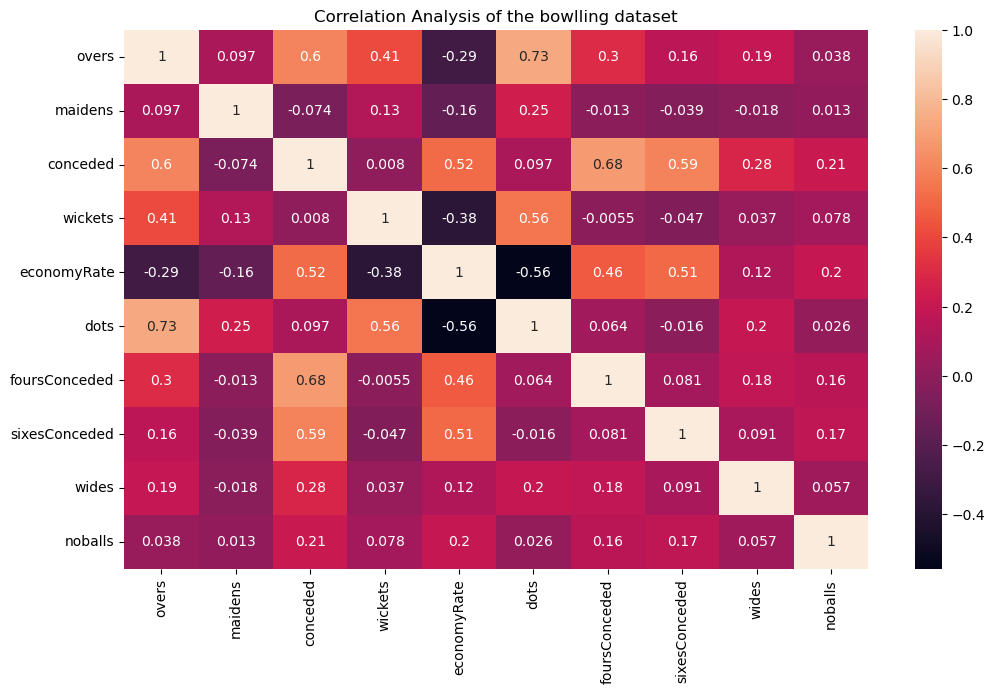

In [31]:
df1= numerical_variables.corr()
plt.figure(figsize=(12,7))
sns.heatmap(df1,annot=True)
plt.title("Correlation Analysis of the bowlling dataset")

#### Getting Only Qualitative Variables

In [11]:
categorical_variables = df.select_dtypes(include='object')
categorical_variables.head()

,match_name,home_team,away_team,bowling_team,venue,city,fullName
0,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,Sam Curran
1,ENG v PAK,PAK,ENG,ENG,Melbourne Cricket Ground,Melbourne,Chris Jordan
2,ENG v PAK,PAK,ENG,PAK,Melbourne Cricket Ground,Melbourne,Shadab Khan
3,ENG v INDIA,INDIA,ENG,ENG,Adelaide Oval,Adelaide,Adil Rashid
4,NZ v PAK,NZ,PAK,PAK,Sydney Cricket Ground,Sydney,Shaheen Shah Afridi


##### Get the Number of Unique Valuecounts of the Every column(Attribute)

In [12]:
df.nunique()

match_id          42
match_name        42
home_team         16
away_team         15
bowling_team      16
venue              7
city               7
innings_id         2
fullName         132
overs             15
maidens            3
conceded          50
wickets            6
economyRate      100
dots              19
foursConceded      9
sixesConceded      6
wides              6
noballs            4
captain            2
dtype: int64

# Analysing Numeical Data

##### Analysing disribution of the given runs of the bowlers (Univariate Analysis)


Text(0.5, 1.0, 'Given Runs Distribution of tne Inning of bowlers')

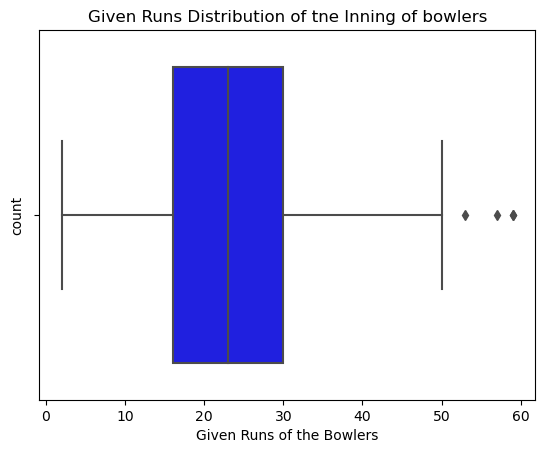

In [13]:
sns.boxplot(x="conceded",data=df,color="blue")
plt.xlabel("Given Runs of the Bowlers")
plt.ylabel("count")
plt.title("Given Runs Distribution of tne Inning of bowlers")

#### Ientifying Upper  and Low Wisker numerically


In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['conceded'].quantile(0.25)
Q3 = df['conceded'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Wisker is :",lower_bound,"And Upper Wisker is :" ,upper_bound)


Lower Wisker is : -5.0 And Upper Wisker is : 51.0


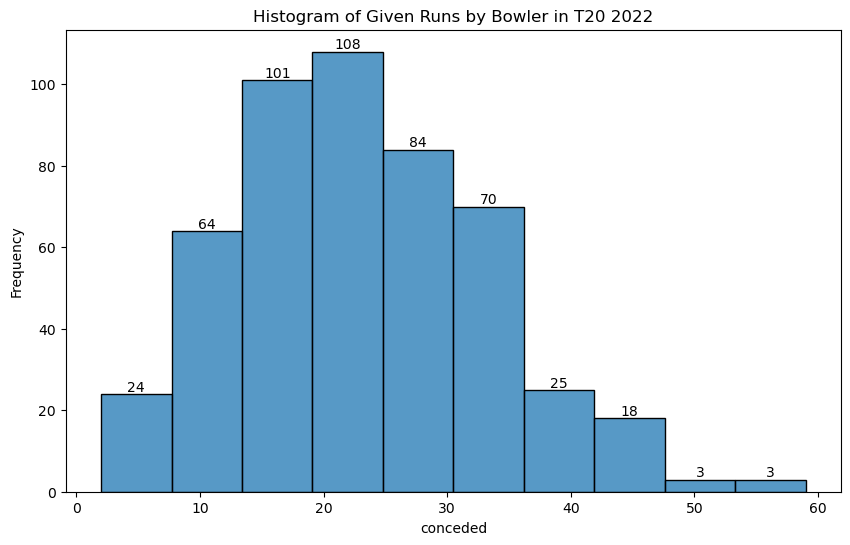

In [15]:

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x="conceded", bins=10)  # Adjust bins as needed

plt.title("Histogram of Given Runs by Bowler in T20 2022")
plt.xlabel("conceded")
plt.ylabel("Frequency")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

According to the above graph it is a like normal distribution 

#### Identify Destribution of the maidens , foursConceded , sixesConceded and dots

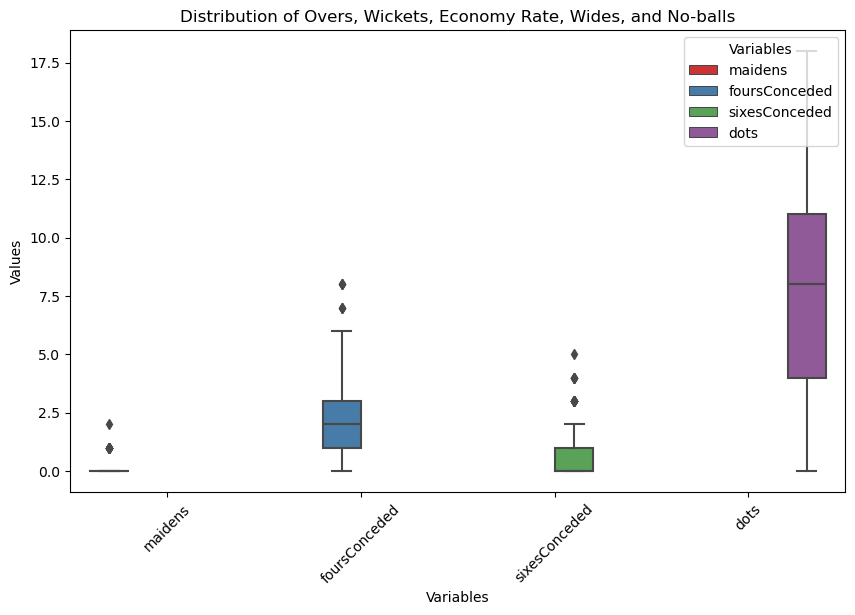

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains all the necessary data

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot boxplots for each variable separately
sns.boxplot(x="variable", y="value", data=pd.melt(df[['maidens', 'foursConceded', 'sixesConceded', 'dots']]), hue="variable", palette="Set1")

# Set labels and title
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Distribution of Overs, Wickets, Economy Rate, Wides, and No-balls")

# Add legend
plt.legend(title="Variables", loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


#### Identify Destribution of the wickets,economyRate,wides,wides and overs

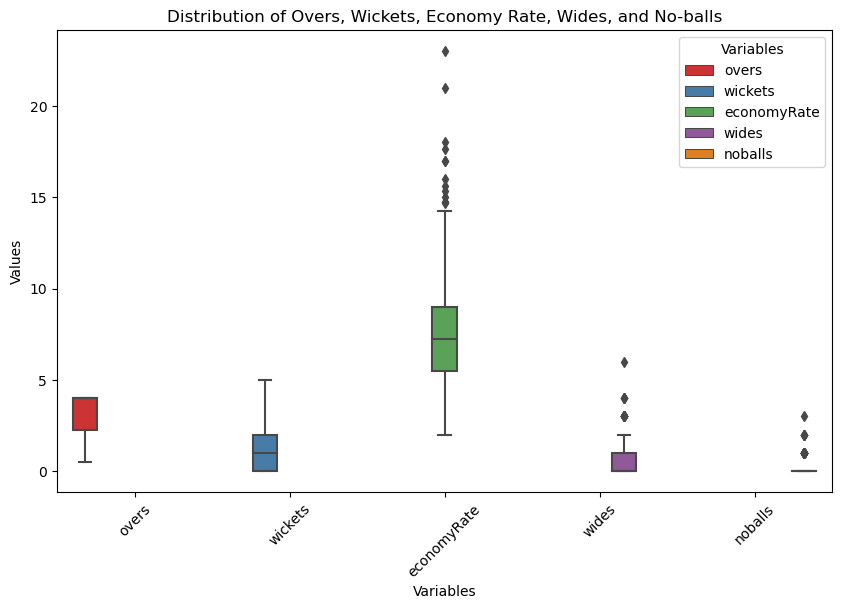

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains all the necessary data

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot boxplots for each variable separately
sns.boxplot(x="variable", y="value", data=pd.melt(df[['overs', 'wickets', 'economyRate', 'wides', 'noballs']]), hue="variable", palette="Set1")

# Set labels and title
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Distribution of Overs, Wickets, Economy Rate, Wides, and No-balls")

# Add legend
plt.legend(title="Variables", loc="upper right")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


# Analysing Cetogorical Data

#### Bowling Team vs No of Maidens Overs of the Tournement

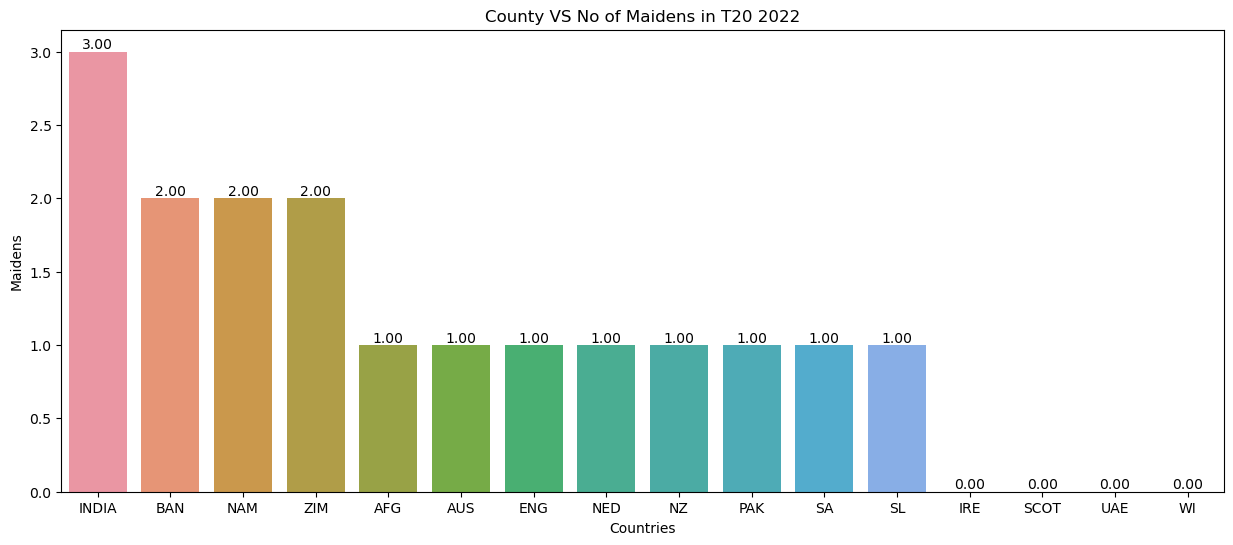

In [18]:


df_sum = df.groupby('bowling_team')['maidens'].sum().reset_index()


df_sum_sorted = df_sum.sort_values(by='maidens', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='maidens', data=df_sum_sorted)
plt.title("County VS No of Maidens in T20 2022")
plt.xlabel("Countries")
plt.ylabel("Maidens")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


#### Bowling Team vs No of Wides Balls of the Tournement

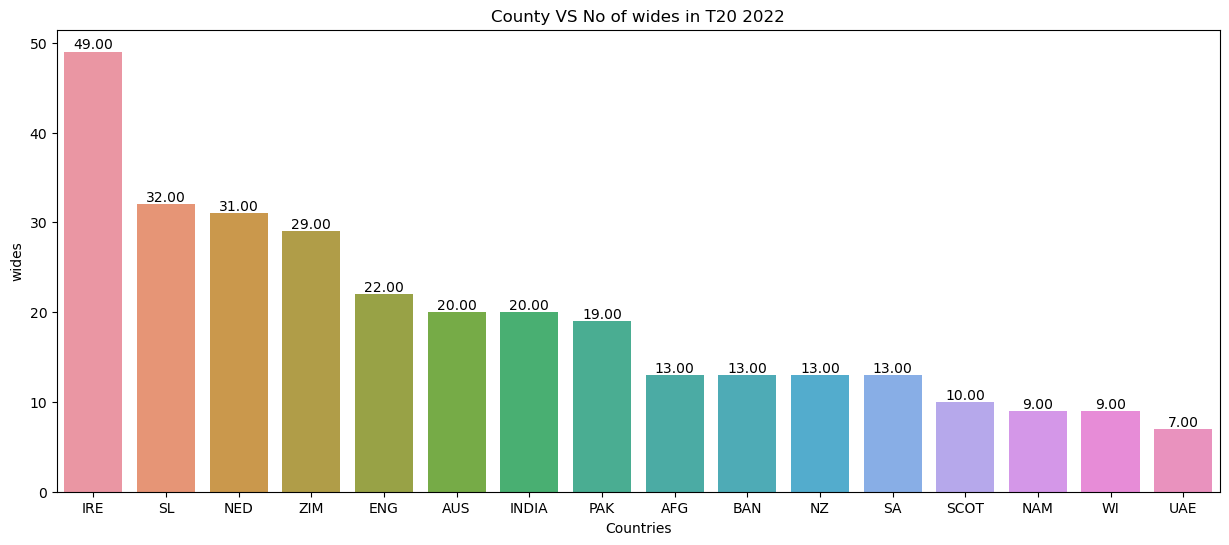

In [19]:
df_sum = df.groupby('bowling_team')['wides'].sum().reset_index()


df_sum_sorted = df_sum.sort_values(by='wides', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='wides', data=df_sum_sorted)
plt.title("County VS No of wides in T20 2022")
plt.xlabel("Countries")
plt.ylabel("wides")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


#### Bowling Team vs No of NO_Balls of the Tournement

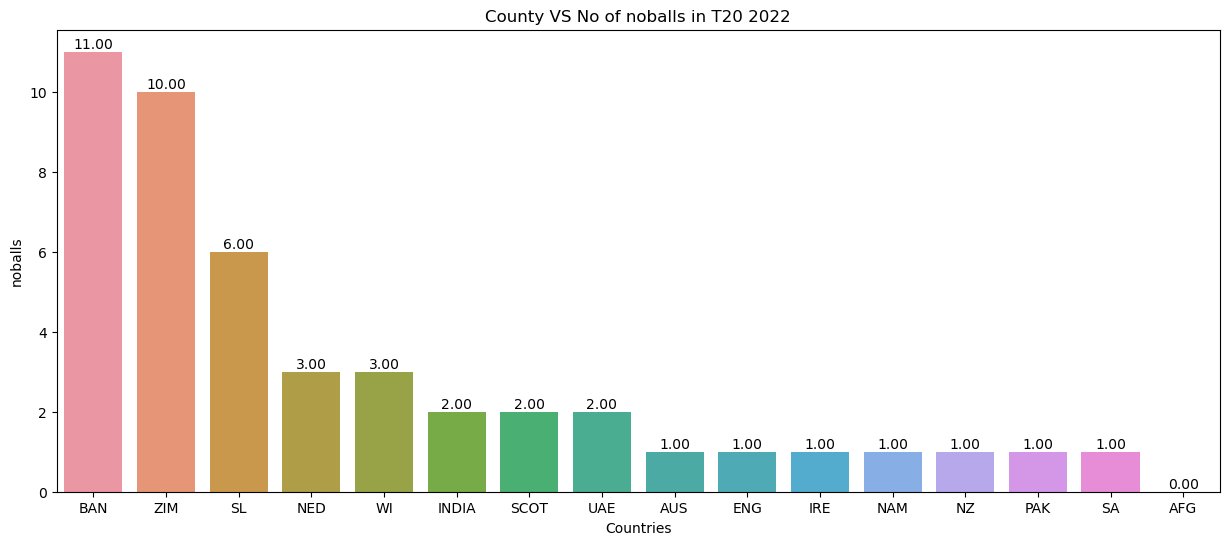

In [20]:
df_sum = df.groupby('bowling_team')['noballs'].sum().reset_index()


df_sum_sorted = df_sum.sort_values(by='noballs', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='noballs', data=df_sum_sorted)
plt.title("County VS No of noballs in T20 2022")
plt.xlabel("Countries")
plt.ylabel("noballs")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


#### Bowling Team vs No of Wickets taken of the Tournement

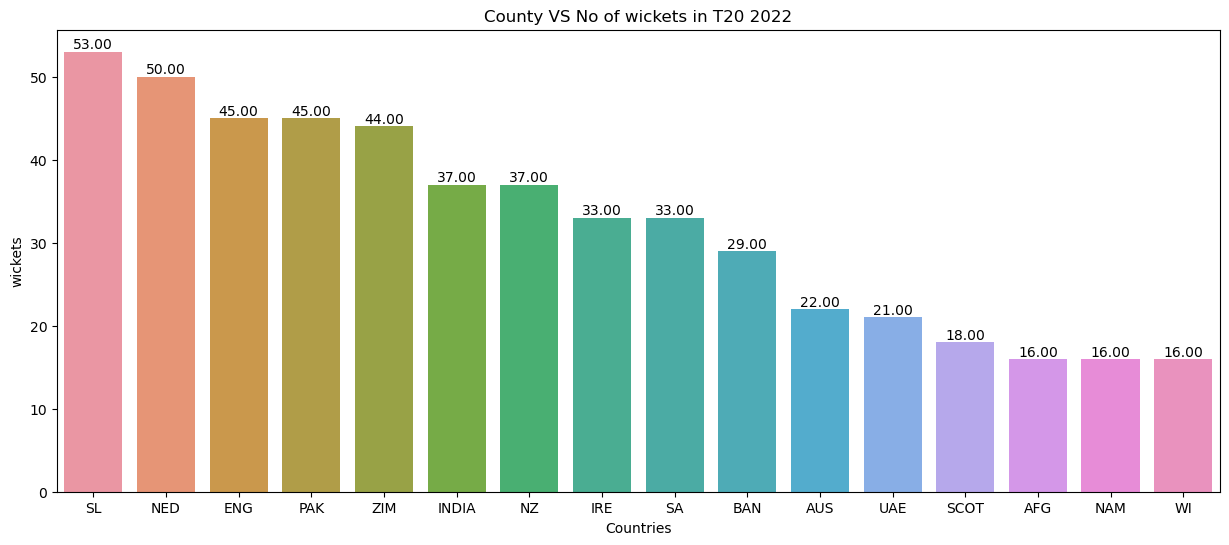

In [21]:
df_sum = df.groupby('bowling_team')['wickets'].sum().reset_index()


df_sum_sorted = df_sum.sort_values(by='wickets', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='wickets', data=df_sum_sorted)
plt.title("County VS No of wickets in T20 2022")
plt.xlabel("Countries")
plt.ylabel("wickets")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


#### Bowling Team vs No of Fours Given of the Tournement

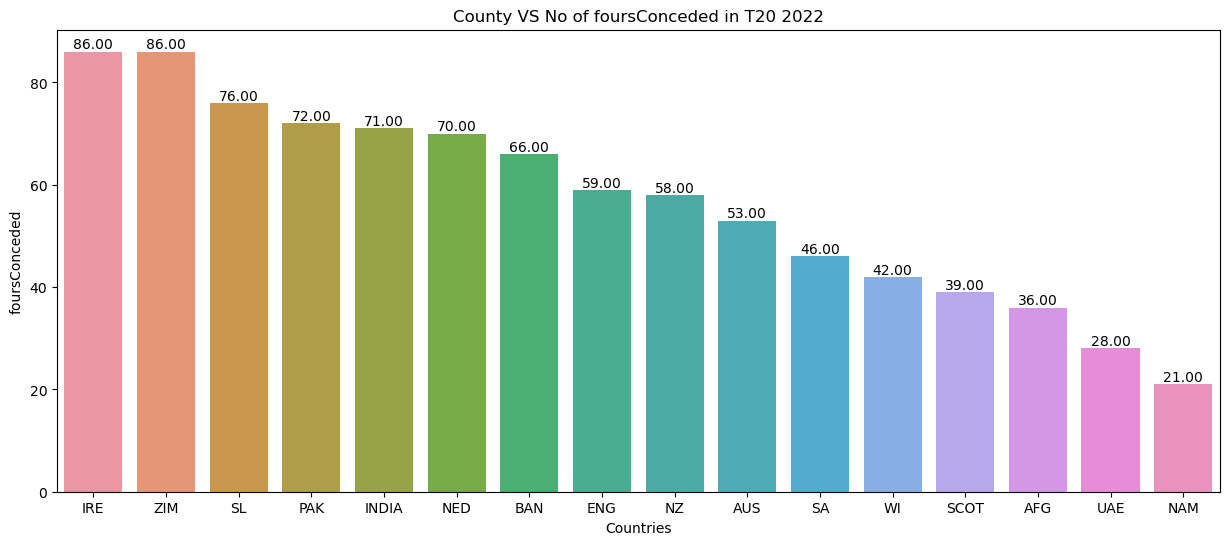

In [22]:
df_sum = df.groupby('bowling_team')['foursConceded'].sum().reset_index()


df_sum_sorted = df_sum.sort_values(by='foursConceded', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='foursConceded', data=df_sum_sorted)
plt.title("County VS No of foursConceded in T20 2022")
plt.xlabel("Countries")
plt.ylabel("foursConceded")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()



#### Bowling Team vs No of Sixes Given of the Tournement

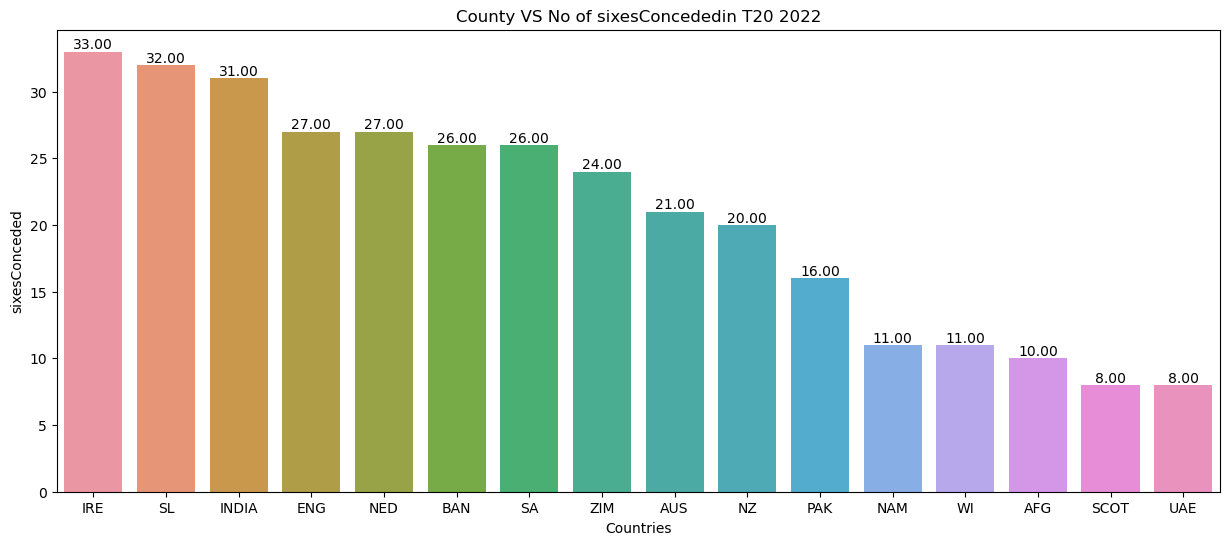

In [23]:
df_sum = df.groupby('bowling_team')['sixesConceded'].sum().reset_index()


df_sum_sorted = df_sum.sort_values(by='sixesConceded', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='sixesConceded', data=df_sum_sorted)
plt.title("County VS No of sixesConcededin T20 2022")
plt.xlabel("Countries")
plt.ylabel("sixesConceded")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


#### Bowling Team vs No of Dots Taken of the Tournement

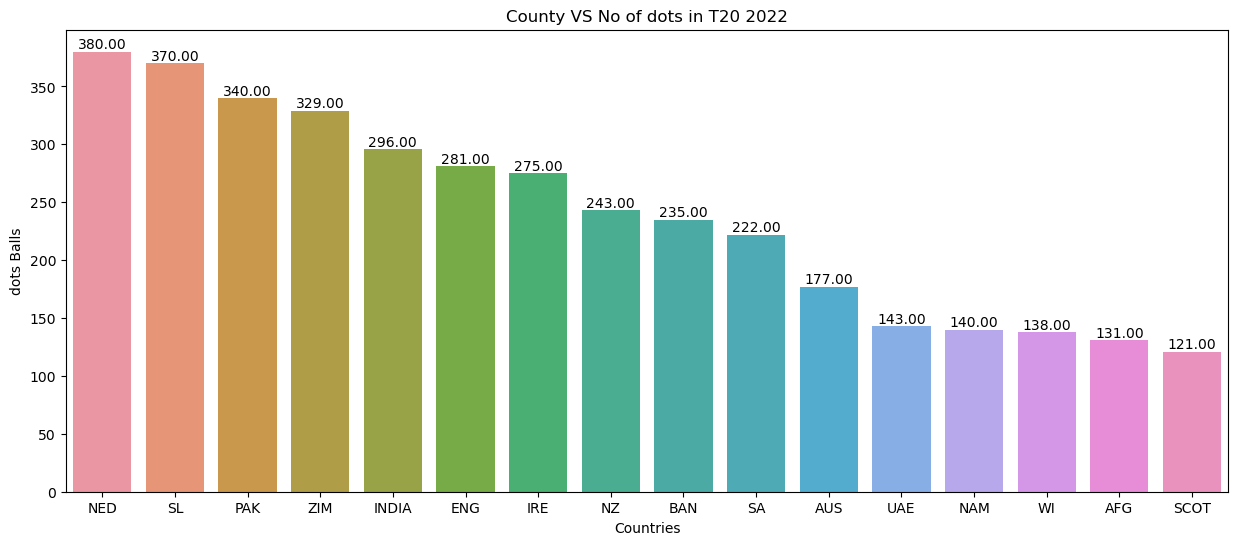

In [24]:
df_sum = df.groupby('bowling_team')['dots'].sum().reset_index()


df_sum_sorted = df_sum.sort_values(by='dots', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='dots', data=df_sum_sorted)
plt.title("County VS No of dots in T20 2022")
plt.xlabel("Countries")
plt.ylabel("dots Balls")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


#### Bowling Team vs No of Given  Average Runs for 4 Overs of the Tournement

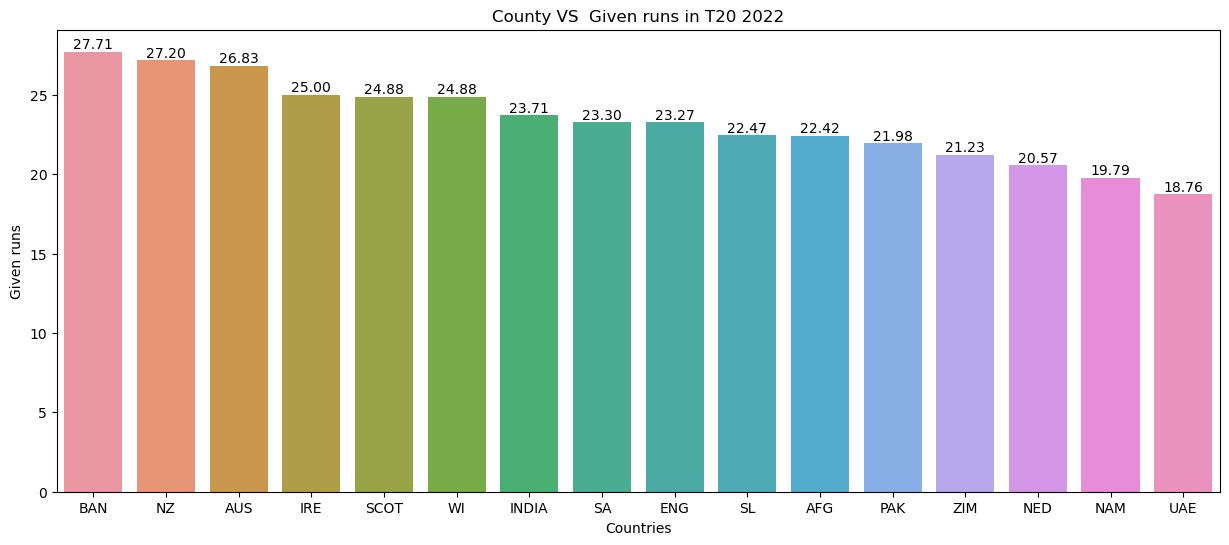

In [25]:
df_sum = df.groupby('bowling_team')['conceded'].mean().reset_index()


df_sum_sorted = df_sum.sort_values(by='conceded', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='conceded', data=df_sum_sorted)
plt.title("County VS  Given runs in T20 2022")
plt.xlabel("Countries")
plt.ylabel("Given runs")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


#### Bowling Team vs Average economyRate  for 4 Overs of the Tournement

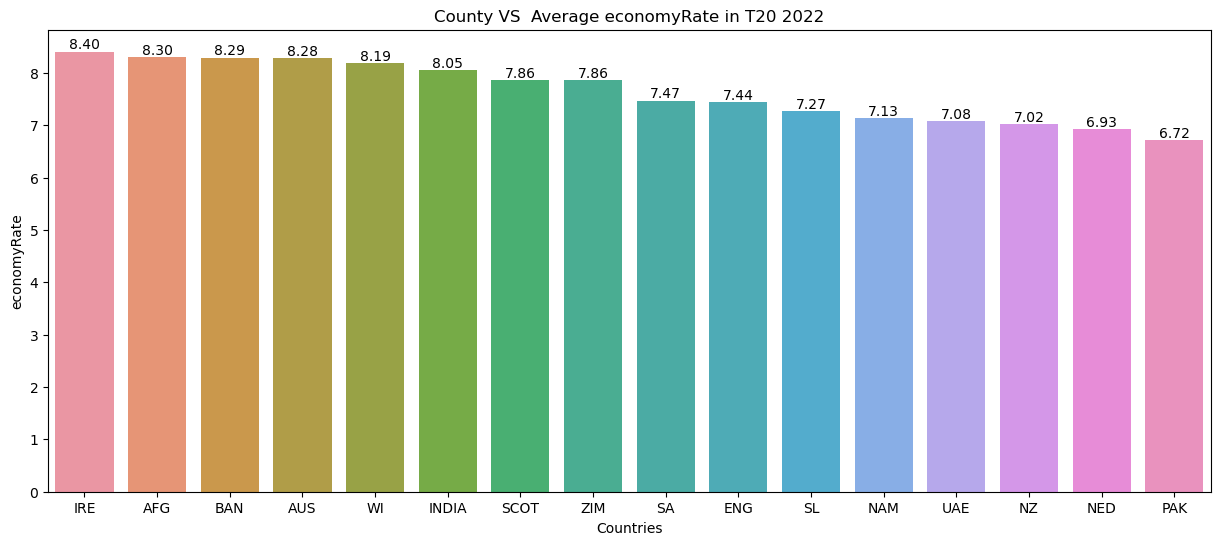

In [26]:
df_sum = df.groupby('bowling_team')['economyRate'].mean().reset_index()


df_sum_sorted = df_sum.sort_values(by='economyRate', ascending=False)
plt.figure(figsize=(15, 6))
# Create bar plot with seaborn
ax = sns.barplot(x='bowling_team', y='economyRate', data=df_sum_sorted)
plt.title("County VS  Average economyRate in T20 2022")
plt.xlabel("Countries")
plt.ylabel("economyRate")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()
